In [1]:
import SimpleITK as sitk
import matplotlib.pylab as plt
import numpy as np
import nibabel as nib
from skimage.transform import resize
from skimage import color
from sklearn.preprocessing import MinMaxScaler

In [2]:
def draw(images, columns=4):
    rows = int(np.ceil(images.shape[0] / columns))
    max_size = 20
    
    width = max(columns * 5, max_size)
    height = width * rows // columns

    plt.figure(figsize=(width, height))
    plt.gray()
    plt.subplots_adjust(0,0,1,1,0.01,0.01)
    for i in range(images.shape[0]):
        plt.subplot(rows,columns,i+1), plt.imshow(images[i]), plt.axis('off')
        # use plt.savefig(...) here if you want to save the images as .jpg, e.g.,
    plt.show()

In [3]:
def scale(array, result_min=0, result_max=1):
    array_min = array.min()
    array_max = array.max()
    
    std = (array - array_min) / (array_max - array_min)
    return std * (result_max - result_min) + result_min

In [4]:
def overlay_mask(images, masks, alpha=0.25):
    background = np.repeat(scale(images[:, :, :, np.newaxis]), 3, axis = 3)
    for i, label in enumerate(np.unique(masks)[1:]):
        background[:,:,:,0][masks == label] *= 1 - alpha
        background[:,:,:,1][masks == label] *= 1 - alpha
        background[:,:,:,2][masks == label] *= 1 - alpha
        background[:,:,:,i%3][masks == label] += alpha
    
    return background

In [5]:
def draw_masked(images, masks, alpha=0.25, columns=4):
    assert images.shape == masks.shape
    
    overlay = overlay_mask(images, masks, alpha)
    
    rows = int(np.ceil(images.shape[0] / columns))
    max_size = 20
    
    width = min(columns * 5, max_size)
    height = width * rows // columns

    fig = plt.figure(figsize=(width, height))
    plt.gray()
    plt.subplots_adjust(0,0,1,1,0.01,0.01)
        
    for i in range(overlay.shape[0]):
        ax = fig.add_subplot(rows,columns,i+1)
        ax.imshow(overlay[i])
        plt.axis('off')
    
    plt.show()

In [6]:
def read_mhd(file):
    return sitk.GetArrayFromImage(sitk.ReadImage(file, sitk.sitkFloat32))

In [7]:
def read_nrrd(file):
    return sitk.GetArrayFromImage(sitk.ReadImage(file, sitk.sitkVectorUInt16))

In [8]:
def read_nii(file):
    return np.asarray(nib.load(file).dataobj).transpose(2, 1, 0)

### VESSEL12

In [12]:
vessel12_4 = read_mhd("VESSEL12_04.mhd")
vessel12_4.shape

(426, 512, 512)

In [13]:
vessel12_4_mask = read_mhd("VESSEL12_04_mask.mhd")
vessel12_4_mask.shape

(426, 512, 512)

In [14]:
vessel12_4.min(), vessel12_4.max()

(-2494.0, 11253.0)

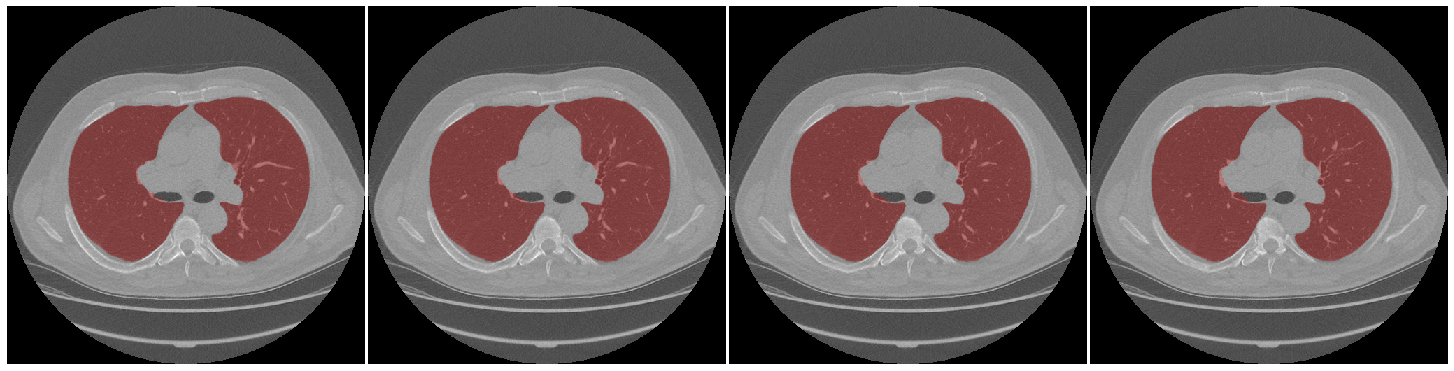

In [15]:
draw_masked(vessel12_4[250:254], vessel12_4_mask[250:254])

In [16]:
vessel12_21 = read_mhd("VESSEL12_21.mhd")

In [17]:
vessel12_21.shape

(459, 512, 512)

In [18]:
vessel12_21_mask = read_mhd("VESSEL12_21_mask.mhd")

In [19]:
vessel12_21_mask.shape

(459, 512, 512)

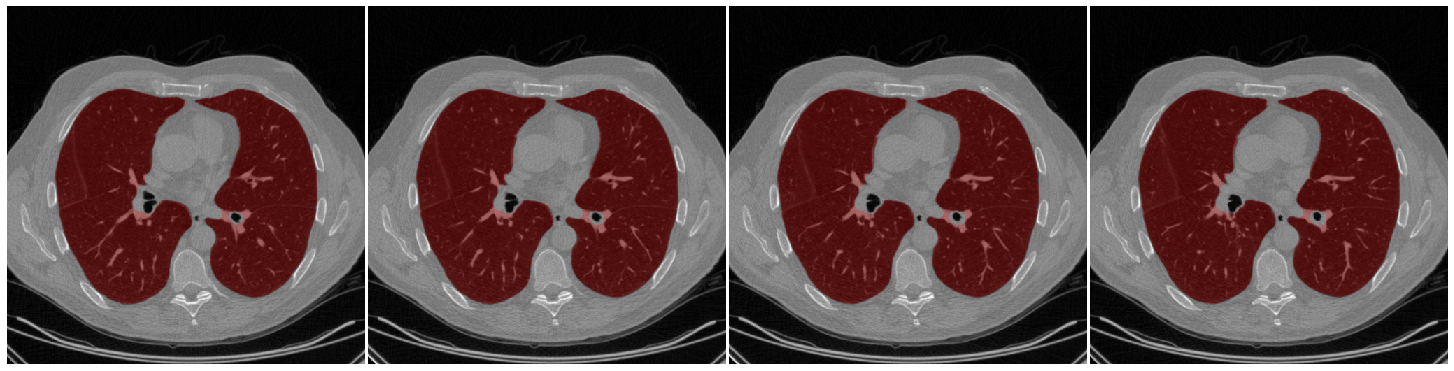

In [20]:
draw_masked(vessel12_21[230:234], vessel12_21_mask[230:234])

### LOLA11

In [14]:
lola11_50 = read_mhd("lola11-50.mhd")
lola11_50.shape

(257, 512, 512)

Masks made by ALTIS

In [15]:
lola11_50_mask = read_nii("lola1150_mask_improved.nii")
lola11_50_mask.shape

(257, 512, 512)

In [16]:
np.unique(lola11_50_mask)

array([0, 1, 2, 3], dtype=uint8)

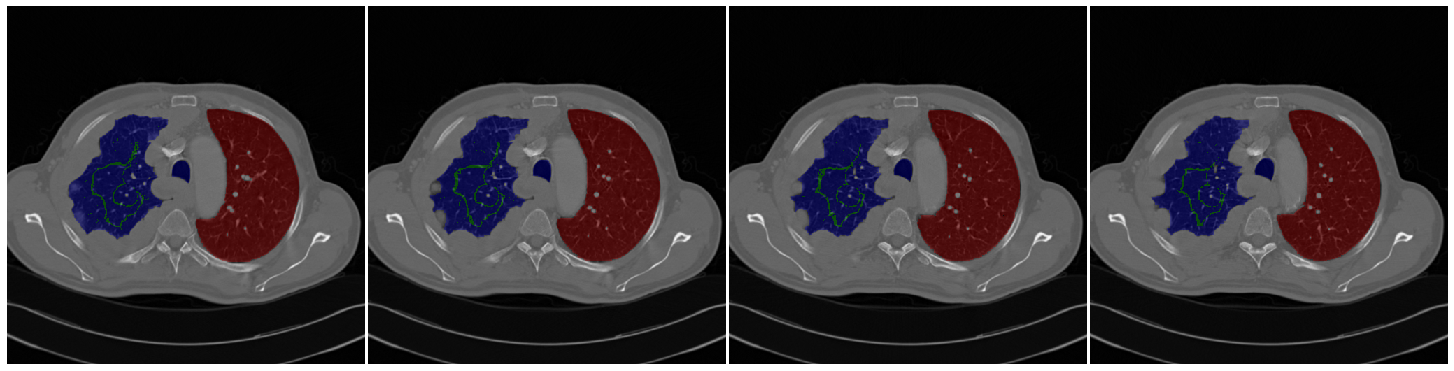

In [23]:
draw_masked(lola11_50[210:214], np.rot90(lola11_50_mask[210:214], k=2, axes=(1,2)))

### LUNA16

In [9]:
luna16 = read_mhd("1.3.6.1.4.1.14519.5.2.1.6279.6001.297251044869095073091780740645.mhd")
luna16.shape

(449, 512, 512)

In [10]:
luna16_mask = read_nrrd("1.3.6.1.4.1.14519.5.2.1.6279.6001.297251044869095073091780740645_LobeSegmentation.nrrd")
luna16_mask.shape

(449, 512, 512)

In [11]:
np.unique(luna16_mask)

array([  0,   1,   4,   5,   6,   7,   8, 512, 516, 517, 518, 519, 520],
      dtype=uint16)

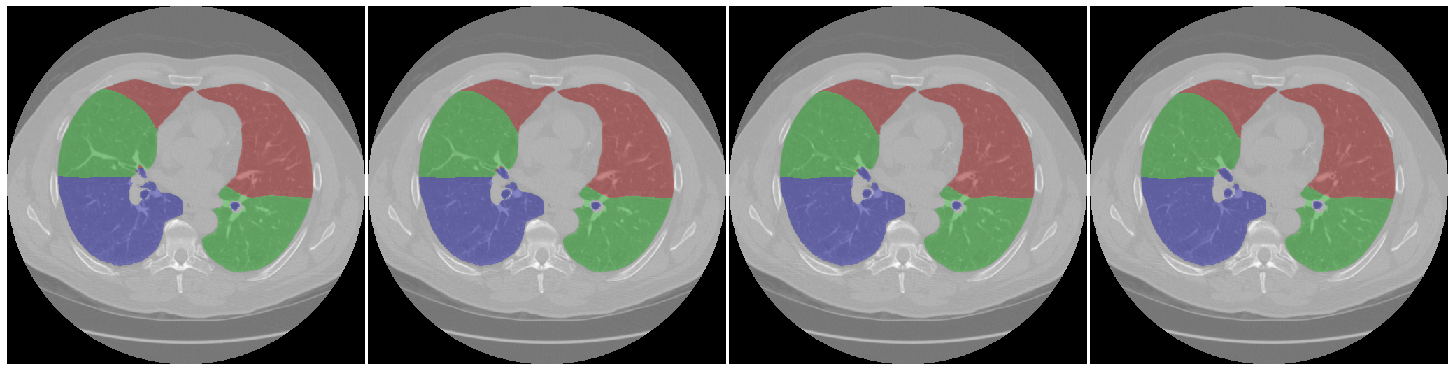

In [13]:
draw_masked(luna16[224:228], luna16_mask[224:228])